In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [2]:
df = pd.read_csv('dataset/ex2data1.txt', header=None, names=['score1', 'score2', 'y'])

In [3]:
df.head()

,score1,score2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score1  100 non-null    float64
 1   score2  100 non-null    float64
 2   y       100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


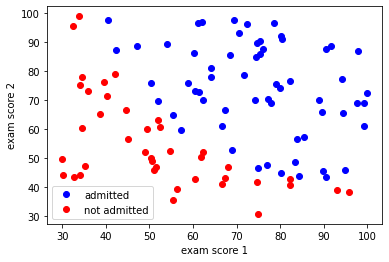

In [5]:
plt.plot(df[df['y']==1]['score1'], df[df['y']==1]['score2'], 'ob')
plt.plot(df[df['y']==0]['score1'], df[df['y']==0]['score2'], 'or')
plt.xlabel('exam score 1')
plt.ylabel('exam score 2')
plt.legend(['admitted', 'not admitted'])
plt.show()

## Logistic regression

Problem: Find a logistic regression model that fits the data above using gradient descent.  

The logistic regression hypothesis function: $$h_{\theta}(x) = g(\theta^Tx)$$  
where sigmoid function $g$ is
$$ g(z) = \frac{1} {1+e^{-z}}$$  


## Gradient Descent


The cost function of logistic regression is: 
$$ J(\theta) = \frac{1}{m}\sum_{i=0}^{i=m}[-y^{(i)} \log(h_\theta(x^{(i)})) - (1-y^{(i)}) \log(1-h_\theta(x^{(i)}))]$$

Also, gradient of the cost function is: 
$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=0}^{i=m}{(h_{\theta} (x^{(i)}) - y^{(i)})x_j^{(i)}}$$

When updating theta,
$$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$$


In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def compute_hypothesis(theta, X):
    return sigmoid(X.dot(theta))

def cost_function(theta, X, y):
    h = compute_hypothesis(theta, X)
    n = len(y)
    cost = sum(-np.multiply(y, np.log(h)) - np.multiply(1-y, np.log(1-h)))/n
    gradient = np.array([sum(np.multiply(h-y, X[:, j:j+1]))/n for j in range(len(theta))])
    return cost, gradient
    
def gradient_descent(X, y, learning_rate, n_iter, epsilon):
    # initialize theta 
    rows, cols = X.shape
#     theta = np.zeros((cols, 1))
    theta = np.array([-24, 0.2, 0.2]).reshape(-1, 1)
    
    costs = []
    for i in range(n_iter):
        cost, gradient = cost_function(theta, X, y)
        costs.append(cost)
        if cost < epsilon: 
            return theta, costs
        
        # update theta 
        theta = theta - learning_rate * gradient
    return theta, costs
    

In [7]:
y = df['y'].to_numpy().reshape(-1, 1)
X = df[['score1', 'score2']].to_numpy()

# append intercept 
intc = np.ones((len(X), 1))
X = np.concatenate([intc, X], axis=1)
rows, cols = X.shape

theta, cost = gradient_descent(X, y, learning_rate=0.00003, n_iter=400, epsilon=0.0001)

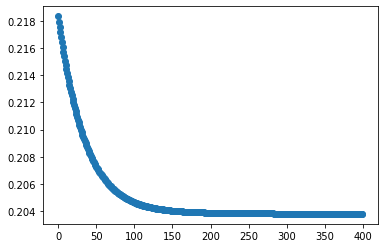

In [8]:
plt.plot(np.arange(len(cost)), cost, 'o-')

In [9]:
theta

array([[-24.00009278],
       [  0.19532231],
       [  0.19378853]])

## Visualize the solution

In [10]:
xx = range(20, 100)
yy = -(theta[0] + theta[1]* xx)/theta[2]

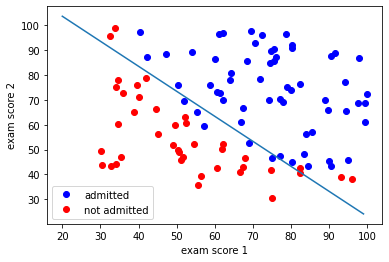

In [11]:
plt.plot(df[df['y']==1]['score1'], df[df['y']==1]['score2'], 'ob')
plt.plot(df[df['y']==0]['score1'], df[df['y']==0]['score2'], 'or')
plt.plot(xx, yy)
plt.xlabel('exam score 1')
plt.ylabel('exam score 2')
plt.legend(['admitted', 'not admitted'])
plt.show()